## Load Dataset into the Drive using Kaggle API

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.layers import Dense,Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers, optimizers
import tensorflow as tf
from tensorflow.keras.applications import ResNet50,VGG16,ResNet101, VGG19, DenseNet201, EfficientNetB4, MobileNetV2
from tensorflow.keras.applications import resnet, vgg16 , vgg19, densenet, efficientnet, mobilenet_v2
from tensorflow.keras import Model

from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.metrics import categorical_crossentropy


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import PIL
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

In [ ]:
! pip install -Uq kaggle
! pip install -Uq fastai==2.2.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.2/191.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.8/776.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 48.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.7.1 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.7.1 which is incompatible.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.7.1 which is incompatible.


In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nowacki","key":"aa355d01f8add9af74f9e71c2928573f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

 99% 117M/119M [00:01<00:00, 76.3MB/s]
100% 119M/119M [00:01<00:00, 88.5MB/s]


In [ ]:
! unzip chest-ctscan-images.zip

In [ ]:
path = "Data/train"
for files in os.listdir(path):
    print(os.path.join(path,files))

Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
Data/train/normal
Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa


In [ ]:
image_paths = ['Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
'Data/train/normal',
'Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
'Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib']

def load_images(image_paths = image_paths, n=16):
    # Load the images from disk.
    images = []
    for i in range(len(image_paths)):
        images_ = [cv2.imread(image_paths[i]+'/'+path) for path in os.listdir(image_paths[i])[:int(n/4)]]
        images.append(images_)
    # Convert to a numpy array and return it.
    sample = np.asarray(images)
    return sample

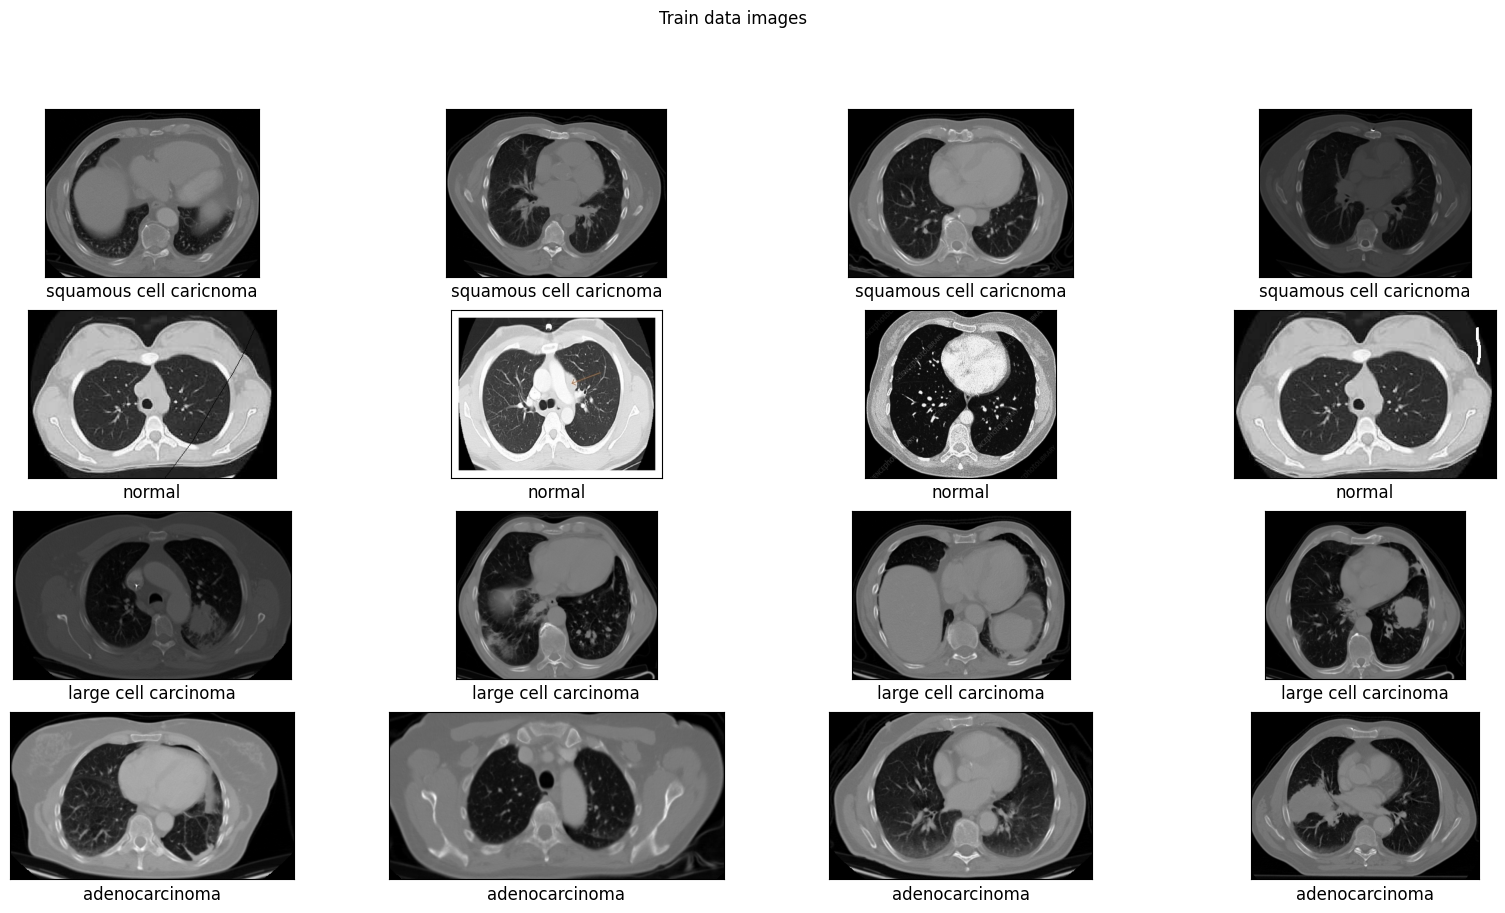

In [ ]:
sample = load_images()
fig = plt.figure(figsize=(20,10))
l = 1
shapes = []
image_category = ["squamous cell caricnoma", "normal", "large cell carcinoma",  "adenocarcinoma"]
fig.suptitle("Train data images")
for i in range(sample.shape[0]):
    for m in range(sample.shape[1]):
        ax = fig.add_subplot(4,4,m+l,xticks = [], yticks = [])
        ax.set_xlabel(image_category[i], fontsize=12)
        ax.imshow(np.squeeze(sample[i,m]))
        shapes.append(sample[i,m].shape)
    l +=4

### Create a new dataset with cancerous and non cancerous images

In [ ]:
! mkdir ct_scan

! mkdir ct_scan/train
! mkdir ct_scan/train/cancerous
! mkdir ct_scan/train/non_cancerous
! cp -r Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/. ct_scan/train/cancerous/
! cp -r Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/. ct_scan/train/cancerous/
! cp -r Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/. ct_scan/train/cancerous/
! cp -r Data/train/normal/. ct_scan/train/non_cancerous/

! mkdir ct_scan/valid
! mkdir ct_scan/valid/cancerous
! mkdir ct_scan/valid/non_cancerous
! cp -r Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/. ct_scan/valid/cancerous/
! cp -r Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/. ct_scan/valid/cancerous/
! cp -r Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/. ct_scan/valid/cancerous/
! cp -r Data/valid/normal/. ct_scan/valid/non_cancerous/

! mkdir ct_scan/test
! mkdir ct_scan/test/cancerous
! mkdir ct_scan/test/non_cancerous
! cp -r Data/test/adenocarcinoma/. ct_scan/test/cancerous/
! cp -r Data/test/large.cell.carcinoma/. ct_scan/test/cancerous/
! cp -r Data/test/squamous.cell.carcinoma/. ct_scan/test/cancerous/
! cp -r Data/test/normal/. ct_scan/test/non_cancerous/

In [ ]:
train_path = "ct_scan/train"
valid_path = "ct_scan/valid"
test_path = "ct_scan/test"

In [ ]:
image_shape = (460,460,3)
N_CLASSES = 2
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32')
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32')
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 566 images belonging to 2 classes.
Found 63 images belonging to 2 classes.
Found 278 images belonging to 2 classes.


### 2D CNN Model

In [ ]:
base_hidden_units = 8
weight_decay = 1e-3
model = Sequential([

    Conv2D(filters = 8 , kernel_size = 2, padding = 'same', activation = 'relu', input_shape = image_shape),
    MaxPooling2D(pool_size = 2),
    
    Conv2D(filters = 16 , kernel_size = 2, padding = 'same', activation = 'relu',
           kernel_regularizer = regularizers.l2(weight_decay)),
    MaxPooling2D(pool_size = 2),
    
    #Conv2D(filters = 64 , kernel_size = 2, padding = 'same', activation = 'relu',
     #     kernel_regularizer = regularizers.l2(weight_decay)),
    #MaxPooling2D(pool_size = 2),
    
    Dropout(0.4),
    Flatten(),
    Dense(300,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 460, 460, 8)       104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 230, 230, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 230, 230, 16)      528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 115, 115, 16)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 115, 115, 16)      0         
                                                                 
 flatten (Flatten)           (None, 211600)            0

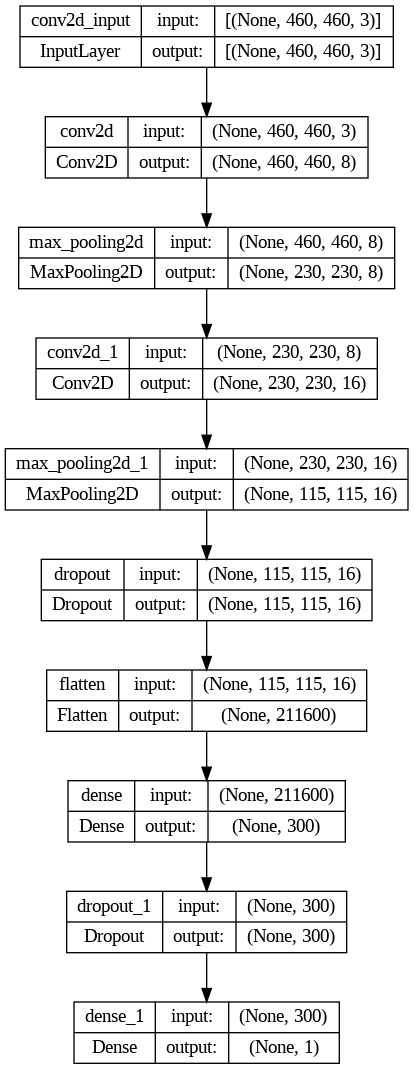

In [ ]:
# show schematic of model:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

### Running model on train data and saving weight in hdf5 format.

In [ ]:
checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/SML_Project/chest_CT_SCAN-2DCNN.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=20)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 15)
optimizer = optimizers.Adam(learning_rate= 0.00001)

model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['acc'])
history = model.fit(train_generator,
                    steps_per_epoch = 10,
                    epochs = 10,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping])

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.3745 - acc: 0.8774
Epoch 1: val_loss improved from inf to 23.90065, saving model to /content/gdrive/My Drive/SML_Project/chest_CT_SCAN-2DCNN.hdf5
10/10 [==============================] - 33s 3s/step - loss: 0.3745 - acc: 0.8774 - val_loss: 23.9006 - val_acc: 0.8730
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.3921 - acc: 0.8719
Epoch 2: val_loss did not improve from 23.90065
10/10 [==============================] - 32s 3s/step - loss: 0.3921 - acc: 0.8719 - val_loss: 38.2800 - val_acc: 0.9048
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.3107 - acc: 0.9258
Epoch 3: val_loss did not improve from 23.90065
10/10 [==============================] - 27s 3s/step - loss: 0.3107 - acc: 0.9258 - val_loss: 35.8029 - val_acc: 0.8889
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.2886 - acc: 0.9125
Epoch 4: val_loss did not improve from 23.90065
10/10 [======

In [ ]:
result = model.evaluate(test_generator)

9/9 [==============================] - 8s 844ms/step - loss: 21.3331 - acc: 0.8453


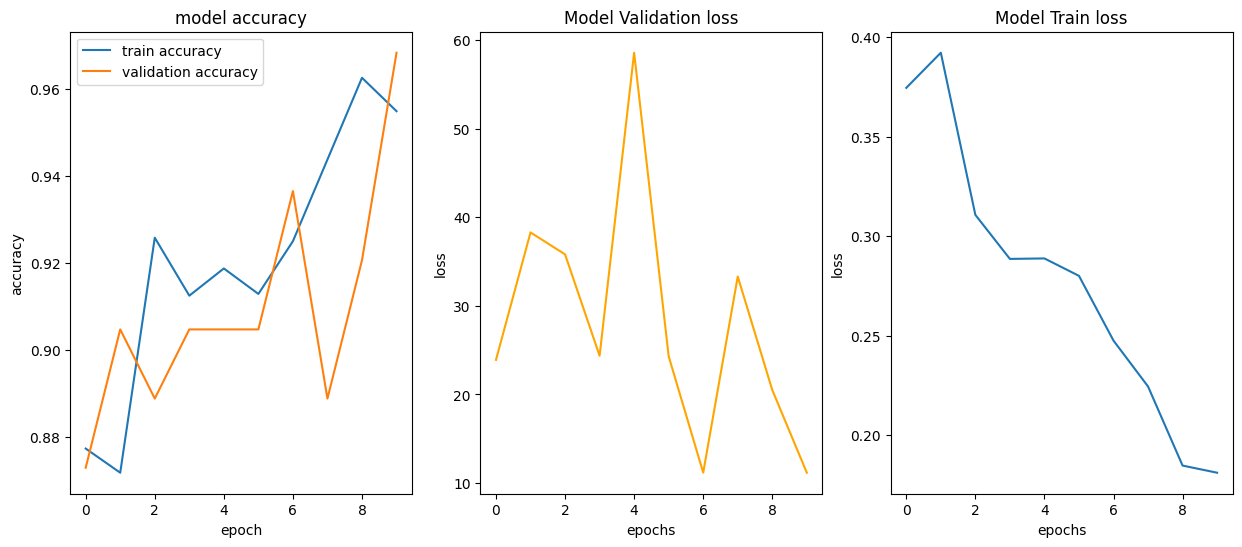

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy','validation accuracy'])

plt.subplot(132)
plt.plot(history.history['val_loss'], color="orange")
plt.title('Model Validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.subplot(133)
plt.plot(history.history['loss'])
plt.title('Model Train loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [ ]:
# Save model to json file
model_json = model.to_json()
with open("/content/gdrive/My Drive/SML_Project/model_2DCNN.json","w") as json_file:
  json_file.write(model_json)

## LIME for 2d *cnn*

In [ ]:
! pip install lime

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as c_map
from IPython.display import Image, display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import lime
from lime import lime_image
from lime import submodular_pick

from skimage.segmentation import mark_boundaries

np.random.seed(123)

In [ ]:
IMG_SIZE = (460, 460)
def transform_image(img):
    '''
    Function to transform an image to normalized numpy array
    '''
    img = image.img_to_array(img)# Transforming the image to get the shape as [channel, height, width]
    img = np.expand_dims(img, axis=0) # Adding dimension to convert array into a batch of size (1,299,299,3)
    img = img/255.0 # normalizing the image to keep within the range of 0.0 to 1.0
    
    return img

# path = "/content/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000021.png"
path = "/content/Data/test/normal/11.png"
img = image.load_img(path, target_size=IMG_SIZE)

normalized_img = transform_image(img)

1/1 [==============================] - 0s 78ms/step
The predicted class is : non cancerous with probability - 0.8913164138793945


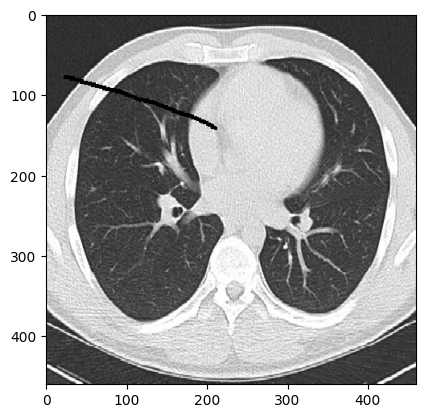

In [ ]:
def get_model_predictions(data):
    model_prediction = model.predict(data)
    if model_prediction[0][0] > model_prediction[0][1] :
      print(f"The predicted class is : cancerous with probability - {model_prediction[0][0]}")
    else :
      print(f"The predicted class is : non cancerous with probability - {model_prediction[0][1]}")
    # return decode_predictions(model_prediction, top=1)[0][0][1]

plt.imshow(normalized_img[0])
pred_orig = get_model_predictions(normalized_img)

In [ ]:
explainer = lime_image.LimeImageExplainer()
exp = explainer.explain_instance(normalized_img[0], 
                                 model.predict)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 269ms/step


(-0.5, 459.5, 459.5, -0.5)

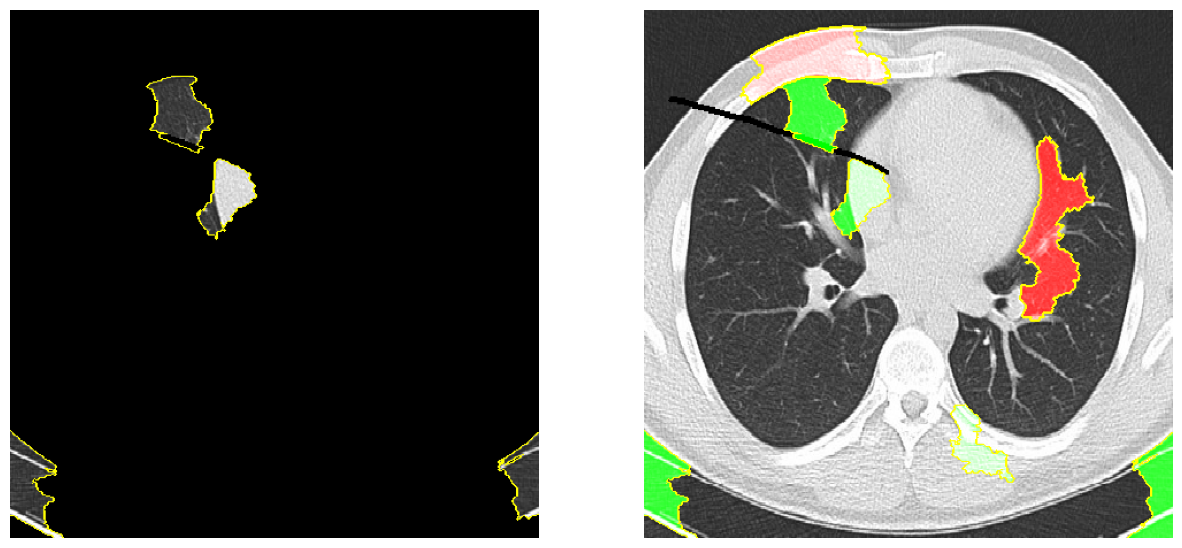

In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = exp.get_image_and_mask(exp.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = exp.get_image_and_mask(exp.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')